In [248]:
'''Basic imports'''
from collections import Counter
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [249]:
'''Import the data and set default line delimiter.'''
df = pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')

'''Data description from Kaggle:-
    
Car_Name
This column should be filled with the name of the car.

Year
This column should be filled with the year in which the car was bought.

Selling_Price
This column should be filled with the price the owner wants to sell the car at.

Present_Price
This is the current ex-showroom price of the car.

Kms_Driven
This is the distance completed by the car in km.

Fuel_Type
Fuel type of the car.

Seller_Type
Defines whether the seller is a dealer or an individual.

Transmission
Defines whether the car is manual or automatic.

Owner
Defines the number of owners the car has previously had.'''

def line_break():
    '''Provide a custom line break string for good visibility'''
    print('******************************************************************************************************')

# Basic exploration on the dataset.

In [250]:
display(df.head(10))
line_break()
print(df.shape)
line_break()
display(df.info())
line_break()
display(df.describe())
line_break()
print(df.memory_usage(deep=True))
line_break()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


******************************************************************************************************
(4340, 8)
******************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


None

******************************************************************************************************


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


******************************************************************************************************
Index               128
name             354125
year              34720
selling_price     34720
km_driven         34720
fuel             273233
seller_type      287416
transmission     274764
owner            297006
dtype: int64
******************************************************************************************************


No missing values, that's great. Let's lower casing the column names.

In [251]:
line_break()
print(df.memory_usage(deep=True))
line_break()
display(df.head())
line_break()
df.columns = [x.lower() for x in df.columns]
line_break()
display(df.head())
line_break()

******************************************************************************************************
Index               128
name             354125
year              34720
selling_price     34720
km_driven         34720
fuel             273233
seller_type      287416
transmission     274764
owner            297006
dtype: int64
******************************************************************************************************


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


******************************************************************************************************
******************************************************************************************************


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


******************************************************************************************************


Add fuel, seller, transmission flags to convert them into numerical data.

In [274]:
def get_fuel_type_flag(s):
    '''0 for Petrol, 1 for Diesel, 2 for Others'''
    if (s.fuel == 'Petrol'):
        return 0
    elif (s.fuel == 'Diesel'):
        return 1
    else:
        return 2
    
def get_seller_type_flag(s):
    '''0 for Dealer, 1 for Individual, 2 for Others'''
    if (s.seller_type == 'Dealer'):
        return 0
    elif (s.seller_type == 'Individual'):
        return 1
    else:
        return 2  
    
def get_transmission_type_flag(s):
    '''0 for Manual, 1 for Automatic, 2 for Others'''
    if (s.transmission == 'Manual'):
        return 0
    elif (s.transmission == 'Automatic'):
        return 1
    else:
        return 2    

df_new = df.copy()    
df_new['fuel_flag'] = df.apply(get_fuel_type_flag, axis=1)  
df_new['seller_flag'] = df.apply(get_seller_type_flag, axis=1)
df_new['transmission_flag'] = df.apply(get_transmission_type_flag, axis=1)
df_new['car_age'] = 2021 - df['year']
df_new.drop(['year','name'],axis=1,inplace=True)
display(df_new.head(10))
df_new.drop_duplicates(subset=None, inplace=True)

,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_flag,seller_flag,transmission_flag,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,0,1,0,14
1,135000,50000,Petrol,Individual,Manual,First Owner,0,1,0,14
2,600000,100000,Diesel,Individual,Manual,First Owner,1,1,0,9
3,250000,46000,Petrol,Individual,Manual,First Owner,0,1,0,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,1,1,0,7
5,140000,125000,Petrol,Individual,Manual,First Owner,0,1,0,14
6,550000,25000,Petrol,Individual,Manual,First Owner,0,1,0,5
7,240000,60000,Petrol,Individual,Manual,Second Owner,0,1,0,7
8,850000,25000,Petrol,Individual,Manual,First Owner,0,1,0,6
9,365000,78000,CNG,Individual,Manual,First Owner,2,1,0,4


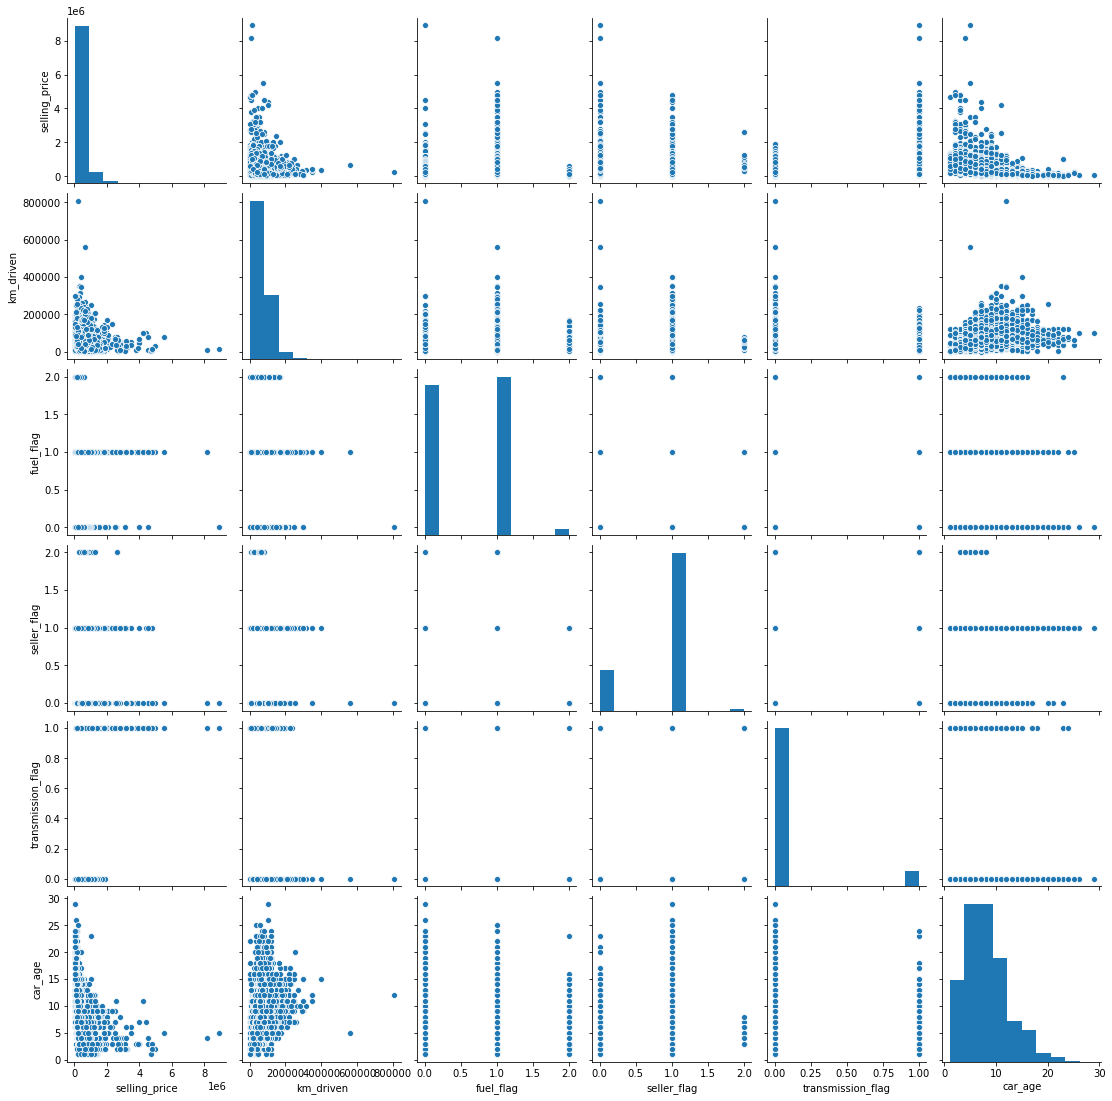

In [275]:
sns.pairplot(df_new)

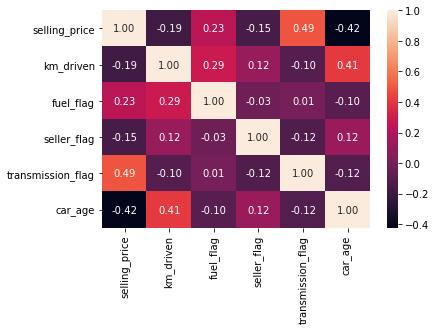

In [276]:
sns.heatmap(df_new.corr(), annot=True, fmt=".2f")
plt.show()

In [277]:
X = df_new[['fuel_flag', 'transmission_flag','car_age']]
# X = df_new[['year', 'present_price']]
Y = df_new['selling_price']


In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=420)

In [279]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [280]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fuel_flag,182371.804916
transmission_flag,792554.623868
car_age,-42941.228750


In [281]:
regressor.intercept_

651469.4710056981

In [282]:
y_pred = regressor.predict(X_train)
df_new2 = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df_new2

,Actual,Predicted
3835,110000,543859.564589
77,925000,662076.360922
1375,475000,533252.674673
2412,515000,533252.674673
3989,475000,307939.641007
...,...,...
883,140000,136174.726007
653,110000,136174.726007
407,250000,136174.726007
1246,150000,93233.497257


Text(0, 0.5, 'Residuals')

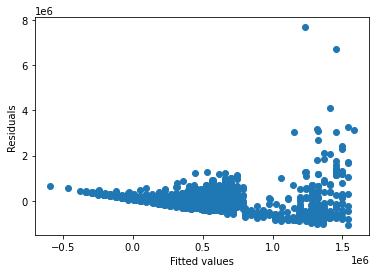

In [283]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [284]:
(y_train-y_pred).mean()

2.4131839406584058e-11

Text(0.5, 0, 'Residuals')

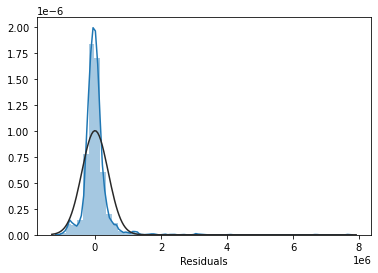

In [285]:
sns.distplot(y_train-y_pred, fit=norm)
plt.xlabel('Residuals')

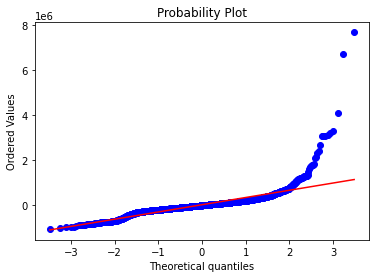

In [286]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [287]:
# Model evaluation metrics - Regression problems

from sklearn import metrics
y_pred1 = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred1)))
line_break()


Mean Absolute Error: 213043.22406290245
Mean Squared Error: 141318533300.23276
Root Mean Squared Error: 375923.5737490172
******************************************************************************************************


In [288]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    '''MAPE function'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Mean Absolute % Error:', mean_absolute_percentage_error(y_test, y_pred1))

Mean Absolute % Error: 66.94908272443615
